- 17-03-2023
- 21-06-2023
- 14-07-2023
- 12-09-2023

This EDA uses preprocessed data (from preprocessed.py). It checks the time distribution (total, by color, by account type), user distribution, and provides a wordcloud and 1 to 6-grams.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar

In [2]:
#the data has already been preprocessed :)
df = pd.read_json("topic_data.json")

In [3]:
len(df)

29832

In [4]:
df.head(2)

tweetDate  twitterId         handle  \
0  Thu Nov 24 19:37:45 +0000 2022   29501253  RepAdamSchiff   
1  Wed Nov 23 16:27:00 +0000 2022   29501253  RepAdamSchiff   

                                                text  \
0  My brother and I are spending today with our d...   
1  I’m heartbroken for the Chesapeake community.\...   

                         profileUser  \
0  https://twitter.com/RepAdamSchiff   
1  https://twitter.com/RepAdamSchiff   

                                           tweetLink  \
0  https://twitter.com/RepAdamSchiff/status/15958...   
1  https://twitter.com/RepAdamSchiff/status/15954...   

                                          mediaUrl               timestamp  \
0  https://pbs.twimg.com/media/FiWmF1DaAAAtIWO.jpg 2022-11-25 15:23:42.214   
1                                             None 2022-11-25 15:23:42.214   

                               query   type  ...  data  error  color  \
0  https://twitter.com/RepAdamSchiff  tweet  ...   NaN    NaN   blue   
1  https://twitter.com/RepAdamSchiff  tweet  ...   NaN    NaN   blue   

   account_type                                              tweet mentions  \
0  professional  brother spend today dad Ed almost 95 mend week...       []   
1  professional  heartbroken Chesapeake community even week las...       []   

  hashtags  len                                             tokens  \
0       []  152  [My, brother, and, I, are, spending, today, wi...   
1       []  171  [I, ’, m, heartbroken, for, the, Chesapeake, c...   

                                           stopwords  
0  [brother, spending, today, dad, Ed, almost, 95...  
1  [heartbroken, Chesapeake, community, even, wee...  

[2 rows x 21 columns]

### EDA

#### Time Interval

In [5]:
def date_creator(tweetDate):
    month = tweetDate[3:7]
    day = tweetDate[8:10]
    year = tweetDate[-5:]
    
    date = day + month + year
    date = pd.to_datetime(date)
    return date

def hour_creator(tweetDate):
    h = tweetDate[11:14]
    m = tweetDate[14:17]
    s = tweetDate[17:20]
    
    hour = h + m + s
    hour = datetime.time(*map(int, hour.split(':')))
    return hour

In [6]:
df['date'] = df['tweetDate'].apply(lambda x: date_creator(x))
df['hour'] = df['tweetDate'].apply(lambda x: hour_creator(x))
df = df[['date', 'hour', 'handle', 'color', 'account_type', 'text', 'tweet', 'mentions', 'tokens','stopwords', 'hashtags']]

In [7]:
df.head(1)

date      hour         handle color  account_type  \
0 2022-11-24  19:37:45  RepAdamSchiff  blue  professional   

                                                text  \
0  My brother and I are spending today with our d...   

                                               tweet mentions  \
0  brother spend today dad Ed almost 95 mend week...       []   

                                              tokens  \
0  [My, brother, and, I, are, spending, today, wi...   

                                           stopwords hashtags  
0  [brother, spending, today, dad, Ed, almost, 95...       []

In [8]:
print("Data begins on", min(df['date']), "and ends on", max(df['date']))

Data begins on 2012-11-04 00:00:00 and ends on 2022-11-25 00:00:00


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

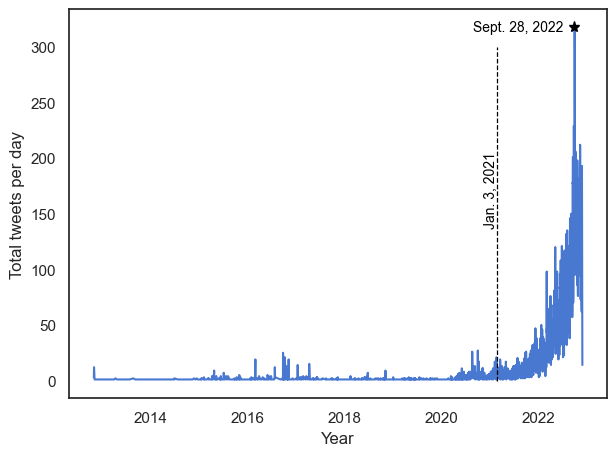

In [9]:
import seaborn as sns
sns.set('notebook', palette='muted')
sns.set_style("white")
t = df.groupby(['date'])['tweet'].count()
sns.lineplot(t)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total tweets per day', fontsize = 12)
sns.set(font_scale=1.2)
plt.tight_layout()

plt.plot(19260, max(t),'*', ms=8, mec='black', mfc='black')
plt.text(18500, 314, "Sept. 28, 2022", horizontalalignment='left', size=10, color='black', weight='regular')
plt.vlines(x = 18680, ymin = 0, ymax = 300, color='black', linestyle = 'dashed', linewidth = 0.9)
plt.text(18580, 140, "Jan. 3, 2021", horizontalalignment='left', rotation = 90, size=10, color='black', weight='regular')
plt.show()

In [10]:
df[df['date'] == '2022-09-28']

date      hour           handle color  account_type  \
37    2022-09-28  19:22:59    RepAdamSchiff  blue  professional   
38    2022-09-28  00:45:00    RepAdamSchiff  blue  professional   
3063  2022-09-28  22:28:45   RepAndyBiggsAZ   red  professional   
3064  2022-09-28  21:25:13   RepAndyBiggsAZ   red  professional   
3065  2022-09-28  21:17:10   RepAndyBiggsAZ   red  professional   
...          ...       ...              ...   ...           ...   
29292 2022-09-28  18:01:18    JohnFetterman  blue      personal   
29293 2022-09-28  16:33:03    JohnFetterman  blue      personal   
29294 2022-09-28  12:31:54    JohnFetterman  blue      personal   
29295 2022-09-28  00:54:03    JohnFetterman  blue      personal   
29463 2022-09-28  17:40:50  LeaderMcConnell   red  professional   

                                                    text  \
37     My thoughts are with the people of Florida as ...   
38     There's no doubt the last year was difficult.\...   
3063   My new border documentary Alien Invasion will ...   
3064   RT @FAIRImmigration: Thank you @RepAndyBiggsAZ...   
3065   Today, I held a forum @FreedomWorks to discuss...   
...                                                  ...   
29292  What promises did Dr. Oz make to Trump in exch...   
29293  For the sake of our children, we simply have t...   
29294  The overhwlmeing Majority of Pennsylvanians: R...   
29295  My heart hurts for Philadelphia tonight. Gisel...   
29463  Democrats wanted one-party control of Washingt...   

                                                   tweet  \
37     thoughts people Florida Hurricane Ian make lan...   
38     doubt last year difficult Jewish community res...   
3063   new border documentary Alien Invasion premiere...   
3064   FAIRImmigration Thank RepAndyBiggsAZ create ti...   
3065   Today hold forum FreedomWorks discuss failures...   
...                                                  ...   
29292  promise Dr. Oz make Trump exchange endorsement...   
29293  sake children simply stop fatal shoot Mayor Br...   
29294  overhwlmeing Majority Pennsylvanians Reproduct...   
29295  heart hurt Philadelphia tonight Gisele devasta...   
29463  Democrats want one-party control Washington ge...   

                                   mentions  \
37                                       []   
38                                       []   
3063                                     []   
3064   [@FAIRImmigration:, @RepAndyBiggsAZ]   
3065       [@FreedomWorks, @DeptVetAffairs]   
...                                     ...   
29292                                    []   
29293                                    []   
29294                                    []   
29295                                    []   
29463                                    []   

                                                  tokens  \
37     [My, thoughts, are, with, the, people, of, Flo...   
38     [There, 's, no, doubt, the, last, year, was, d...   
3063   [My, new, border, documentary, Alien, Invasion...   
3064   [@, FAIRImmigration, :, Thank, you, @, RepAndy...   
3065   [Today, ,, I, held, a, forum, @, FreedomWorks,...   
...                                                  ...   
29292  [What, promises, did, Dr., Oz, make, to, Trump...   
29293  [For, the, sake, of, our, children, ,, we, sim...   
29294  [The, overhwlmeing, Majority, of, Pennsylvania...   
29295  [My, heart, hurts, for, Philadelphia, tonight,...   
29463  [Democrats, wanted, one-party, control, of, Wa...   

                                               stopwords hashtags  
37     [thoughts, people, Florida, Hurricane, Ian, ma...       []  
38     [doubt, last, year, difficult, Jewish, communi...       []  
3063   [new, border, documentary, Alien, Invasion, pr...       []  
3064   [FAIRImmigration, Thank, RepAndyBiggsAZ, creat...       []  
3065   [Today, held, forum, FreedomWorks, discuss, fa...       []  
...                                                  ...      ...  
292

### Limiting to Congress 117th

In [11]:
#limiting to 117th congress tweets
mask = (df['date'] >= pd.to_datetime('2021-1-1')) 
df = df.loc[mask]

In [12]:
len(df)

27782

### Weekly binning
topic analysis might be relevant at a weekly or monthly basis. let's create features for both 

In [13]:
week = []
weekday = [] #monday is 0
month = []
year = []
for i in range(len(df)):
    week.append(datetime.date(int(str(df.date.iloc[i])[:4]), int(str(df.date.iloc[i])[5:7]), int(str(df.date.iloc[i])[8:11])).isocalendar()[1])
    weekday.append(datetime.date(int(str(df.date.iloc[i])[:4]), int(str(df.date.iloc[i])[5:7]), int(str(df.date.iloc[i])[8:11])).isocalendar()[2])
    month.append(calendar.month_name[int(str(df.date.iloc[i])[5:7])])
    year.append(datetime.date(int(str(df.date.iloc[i])[:4]), int(str(df.date.iloc[i])[5:7]), int(str(df.date.iloc[i])[8:11])).isocalendar()[0])
    
df['week'] = week
df['weekday'] = weekday
df['month'] = month
df['year'] = year

### Morality

In [14]:
import moralstrength
from moralstrength.moralstrength import *

t = df.tokens[0]

In [15]:
result = estimate_morals(t, process=True)

/opt/homebrew/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [16]:
result

care  fairness  loyalty  authority  purity
0    NaN       NaN      NaN        NaN     NaN
1    NaN       NaN      NaN   7.666667     NaN
2    NaN       NaN      NaN        NaN     NaN
3    NaN       NaN      NaN        NaN     NaN
4    NaN       NaN      NaN        NaN     NaN
..   ...       ...      ...        ...     ...
57   NaN       NaN      NaN        NaN     NaN
58   NaN       NaN      NaN        NaN     NaN
59   NaN       NaN      NaN        NaN     NaN
60   NaN       NaN      NaN        NaN     NaN
61   NaN       NaN      NaN        NaN     NaN

[62 rows x 5 columns]

In [17]:
result = string_average_moral(df.tweet[0], 'authority')

In [18]:
result

7.666666666669999

In [19]:
morals = ['care', 'fairness', 'loyalty', 'authority','purity']

In [20]:
df['care'] = df['tweet'].apply(lambda x: string_average_moral(x, 'care'))
df['fairness'] = df['tweet'].apply(lambda x: string_average_moral(x, 'fairness'))
df['loyalty'] = df['tweet'].apply(lambda x: string_average_moral(x, 'loyalty'))
df['authority'] = df['tweet'].apply(lambda x: string_average_moral(x, 'authority'))
df['purity'] = df['tweet'].apply(lambda x: string_average_moral(x, 'purity'))

KeyboardInterrupt: 

In [ ]:
df.head(2)

In [ ]:
#export new processed data to json
df.to_json('data.json', orient='index')

#### Users

In [14]:
personal = {
    'AOC': 'Alexandra Ocasio-Cortez',
    'AdamSchiff': 'Adam Schiff',
    'BernieSanders': 'Bernie Sanders',
    'CoryBooker': 'Cory Booker',
    'JoeBiden': 'Joe Biden',
    'JohnCornyn': 'John Cornyn',
    'JohnFetterman': 'John Fetterman',
    'KamalaHarris': 'Kamala Harris',
    'MarshaBlackburn': 'Marsha Blackburn',
    'MittRomney': 'Mitt Romney',
    'PattyMurray': 'Patty Murray',
    'PramilaJayapal': 'Pramila Jayapal',
    'RandPaul': 'Rand Paul',
    'SpeakerPelosi': 'Nancy Pelosi',
    'StenyHoyer': 'Steny Hoyer',
    'chuckschumer': 'Chuck Schumer',
    'ewarren': 'Elizabeth Warren',
    'marcorubio': 'Marco Rubio'
 }

professional = {
    'GOPLeader': 'Kevin McCarthy',
    'Jim_Jordan': 'Jim Jordan',
    'JoaquinCastrotx': 'Joaquin Castro',
    'LeaderHoyer': 'Steny Hoyer',
    'LeaderMcConnell': 'Mitch McConnell',
    'POTUS': 'Joe Biden',
    'RepAOC': 'Alexandra Ocasio-Cortez',
    'RepAdamSchiff': 'Adam Schiff',
    'RepAndyBiggsAZ': 'Andy Biggs',
    'RepJayapal': 'Pramila Jayapal',
    'RepLeeZeldin': 'Lee Zeldin',
    'RepMTG': 'Marjorie Taylor Greene',
    'RepMattGaetz': 'Matt Gaetz',
    'SenBooker': 'Cory Booker',
    'SenJohnKennedy': 'John Kennedy',
    'SenRickScott': 'Rick Scott',
    'SenRubioPress': 'Marco Rubio',
    'SenSanders': 'Bernie Sanders',
    'SenSchumer': 'Charles Schumer',
    'SenTedCruz': 'Ted Cruz',
    'SenWarren': 'Elizabeth Warren',
    'SenatorRomney': 'Mitt Romney',
    'TeamPelosi': 'Nancy Pelosi',
    'VP': 'Kamala Harris'
}

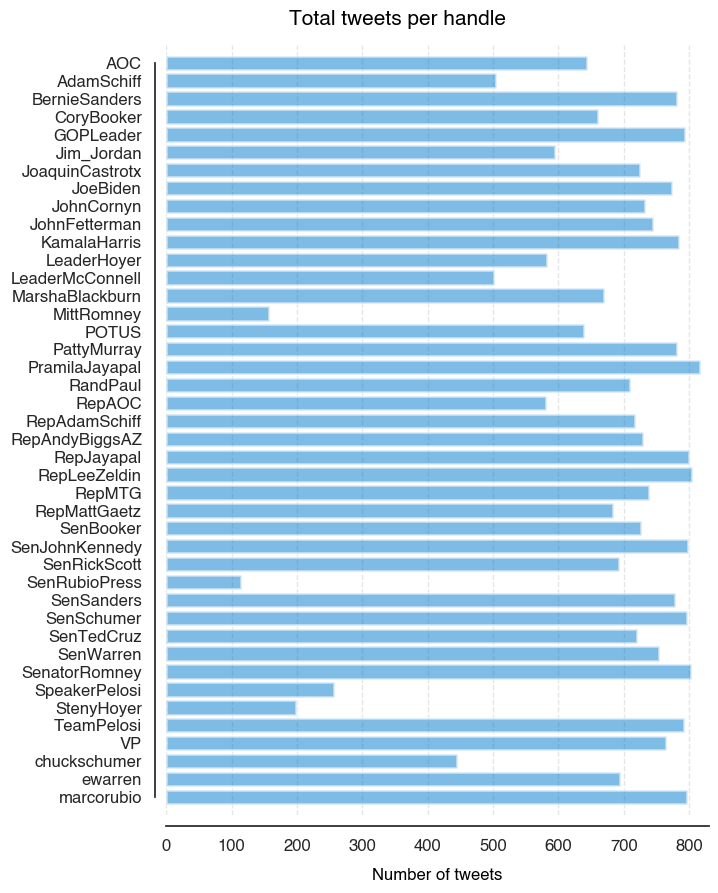

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style('white')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

tweets_per_handle = df.groupby(['handle'])['tweet'].count()
my_range = sorted(list(set(df.handle)))
fig, ax = plt.subplots(figsize=(7,10))

ax.set_xlabel('Number of tweets', fontsize=12, fontweight='black', color = 'black', labelpad=10)
ax.set_ylabel("", labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)

fig.text(0.3, 0.9, 'Total tweets per handle', fontsize=15, fontweight='black', color = 'black')

ax.spines[['top', 'right']].set_visible('False')
ax.spines['left'].set_bounds((0, len(my_range)-1))
ax.set_xlim(0,830)
ax.set_ylim(-1,42)
ax.invert_yaxis()
ax.xaxis.grid(linestyle='--', alpha=0.5)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 8))
sns.despine()
plt.barh(my_range, tweets_per_handle, color="#007ACC",
          alpha=0.5, linewidth = 2)
plt.show()

In [23]:
tweets_per_handle

handle
AOC                644
AdamSchiff         504
BernieSanders      782
CoryBooker         660
GOPLeader          793
Jim_Jordan         595
JoaquinCastrotx    724
JoeBiden           774
JohnCornyn         733
JohnFetterman      745
KamalaHarris       785
LeaderHoyer        583
LeaderMcConnell    501
MarshaBlackburn    670
MittRomney         157
POTUS              639
PattyMurray        782
PramilaJayapal     817
RandPaul           710
RepAOC             581
RepAdamSchiff      717
RepAndyBiggsAZ     729
RepJayapal         799
RepLeeZeldin       804
RepMTG             738
RepMattGaetz       684
SenBooker          727
SenJohnKennedy     798
SenRickScott       693
SenRubioPress      115
SenSanders         779
SenSchumer         797
SenTedCruz         720
SenWarren          754
SenatorRomney      802
SpeakerPelosi      257
StenyHoyer         198
TeamPelosi         792
VP                 765
chuckschumer       445
ewarren            694
marcorubio         796
Name: tweet, dtype: int64

In [16]:
tweets_per_handle = (df.groupby(['color'])['tweet'].count()/len(df))*100
tweets_per_handle

color
blue     54.650493
red      39.730761
white     5.618746
Name: tweet, dtype: float64

In [17]:
my_range

['AOC',
 'AdamSchiff',
 'BernieSanders',
 'CoryBooker',
 'GOPLeader',
 'Jim_Jordan',
 'JoaquinCastrotx',
 'JoeBiden',
 'JohnCornyn',
 'JohnFetterman',
 'KamalaHarris',
 'LeaderHoyer',
 'LeaderMcConnell',
 'MarshaBlackburn',
 'MittRomney',
 'POTUS',
 'PattyMurray',
 'PramilaJayapal',
 'RandPaul',
 'RepAOC',
 'RepAdamSchiff',
 'RepAndyBiggsAZ',
 'RepJayapal',
 'RepLeeZeldin',
 'RepMTG',
 'RepMattGaetz',
 'SenBooker',
 'SenJohnKennedy',
 'SenRickScott',
 'SenRubioPress',
 'SenSanders',
 'SenSchumer',
 'SenTedCruz',
 'SenWarren',
 'SenatorRomney',
 'SpeakerPelosi',
 'StenyHoyer',
 'TeamPelosi',
 'VP',
 'chuckschumer',
 'ewarren',
 'marcorubio']

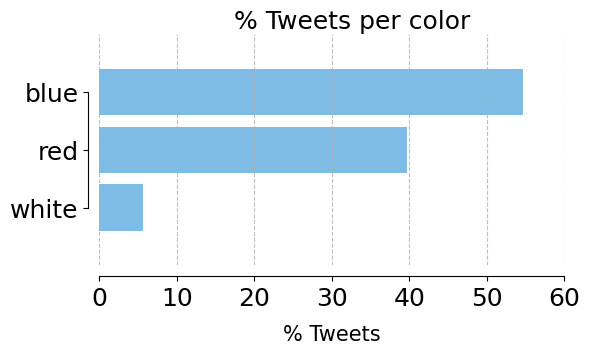

In [22]:
plt.rcParams.update(plt.rcParamsDefault)
my_range = ['blue', 'red', 'white']
fig, ax = plt.subplots(figsize=(6,3))

ax.set_xlabel('% Tweets', fontsize=12, color = 'black', labelpad=10)
ax.set_ylabel("", labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12, left=True, bottom = True)

fig.text(0.35, 0.9, '% Tweets per color', fontsize=18,  color = 'black')

ax.spines[['top', 'right']].set_visible('False')
ax.spines['left'].set_bounds((0, 2))
ax.set_xlim(0,60)
ax.set_ylim(-1,3)
ax.invert_yaxis()

ax.xaxis.grid(linestyle='--', alpha=0.8)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 8))
ax.set_xlabel("% Tweets", fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.despine()
plt.barh(my_range, tweets_per_handle, color="#007ACC",
          alpha=0.5, linewidth = 2)
plt.show()

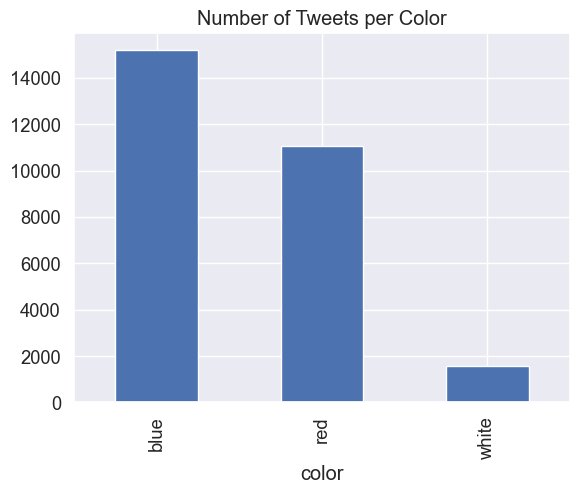

In [105]:
df.groupby(['color'])['tweet'].count().plot(kind='bar', title="Number of Tweets per Color");

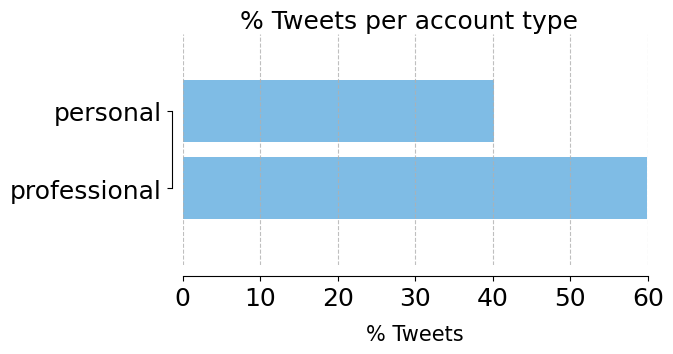

In [24]:
my_range=['personal', 'professional']
tweets_per_handle = (df.groupby(['account_type'])['tweet'].count()/len(df))*100
plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots(figsize=(6,3))

ax.set_xlabel('% Tweets', fontsize=12, color = 'black', labelpad=10)
ax.set_ylabel("", labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12, left=True, bottom = True)

fig.text(0.22, 0.9, '% Tweets per account type', fontsize=18, color = 'black')

ax.spines[['top', 'right']].set_visible('False')
ax.spines['left'].set_bounds((0, 1))
ax.set_xlim(0,60)
ax.set_ylim(-1,2)
ax.invert_yaxis()

ax.xaxis.grid(linestyle='--', alpha=0.8)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 8))
ax.set_xlabel("% Tweets", fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.despine()
plt.barh(my_range, tweets_per_handle, color="#007ACC",
          alpha=0.5, linewidth = 2)
plt.show()

In [501]:
tweets_per_handle

account_type
personal        40.144698
professional    59.855302
Name: tweet, dtype: float64

In [502]:
24/(18+24)

0.5714285714285714

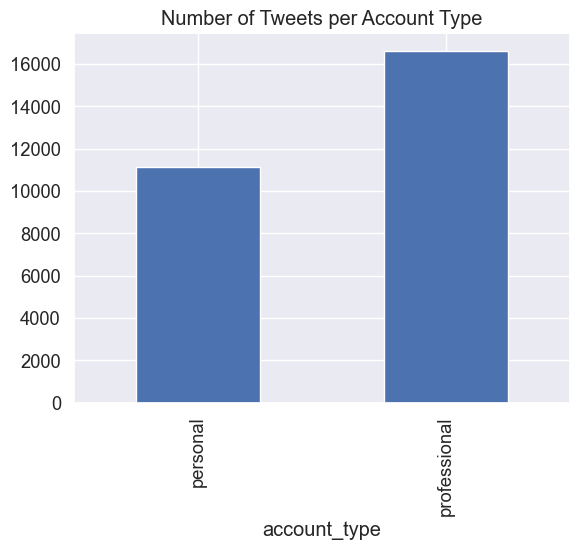

In [106]:
df.groupby(['account_type'])['tweet'].count().plot(kind='bar', title="Number of Tweets per Account Type");

#### Length

In [155]:
df['len'] = df['tweet'].apply(lambda x: len(x))
print('Max number of relevant tokens in a processed tweet is', max(df['len']), 'and minimum is', min(df['len']))

Max number of relevant tokens in a processed tweet is 268 and minimum is 1


In [156]:
tweets_per_handle = df.groupby(['len'])['tweet'].count()

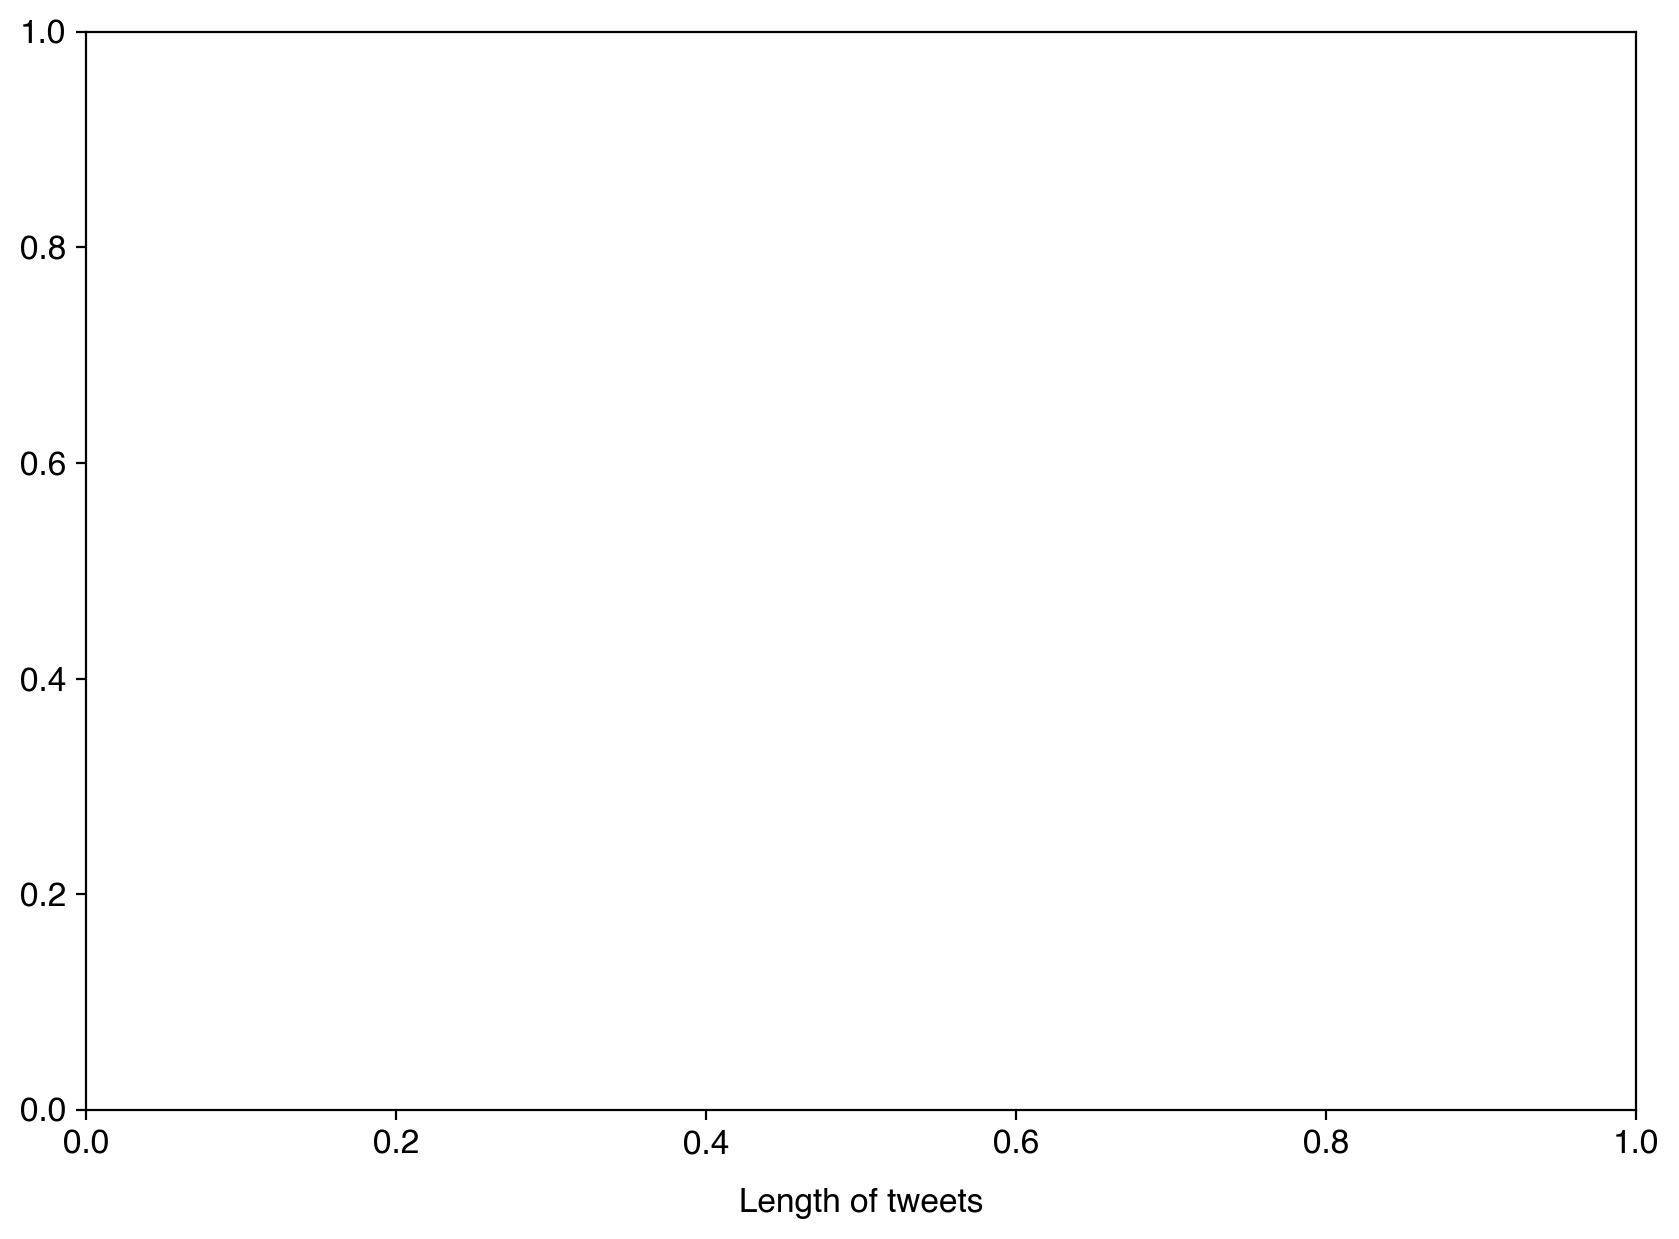

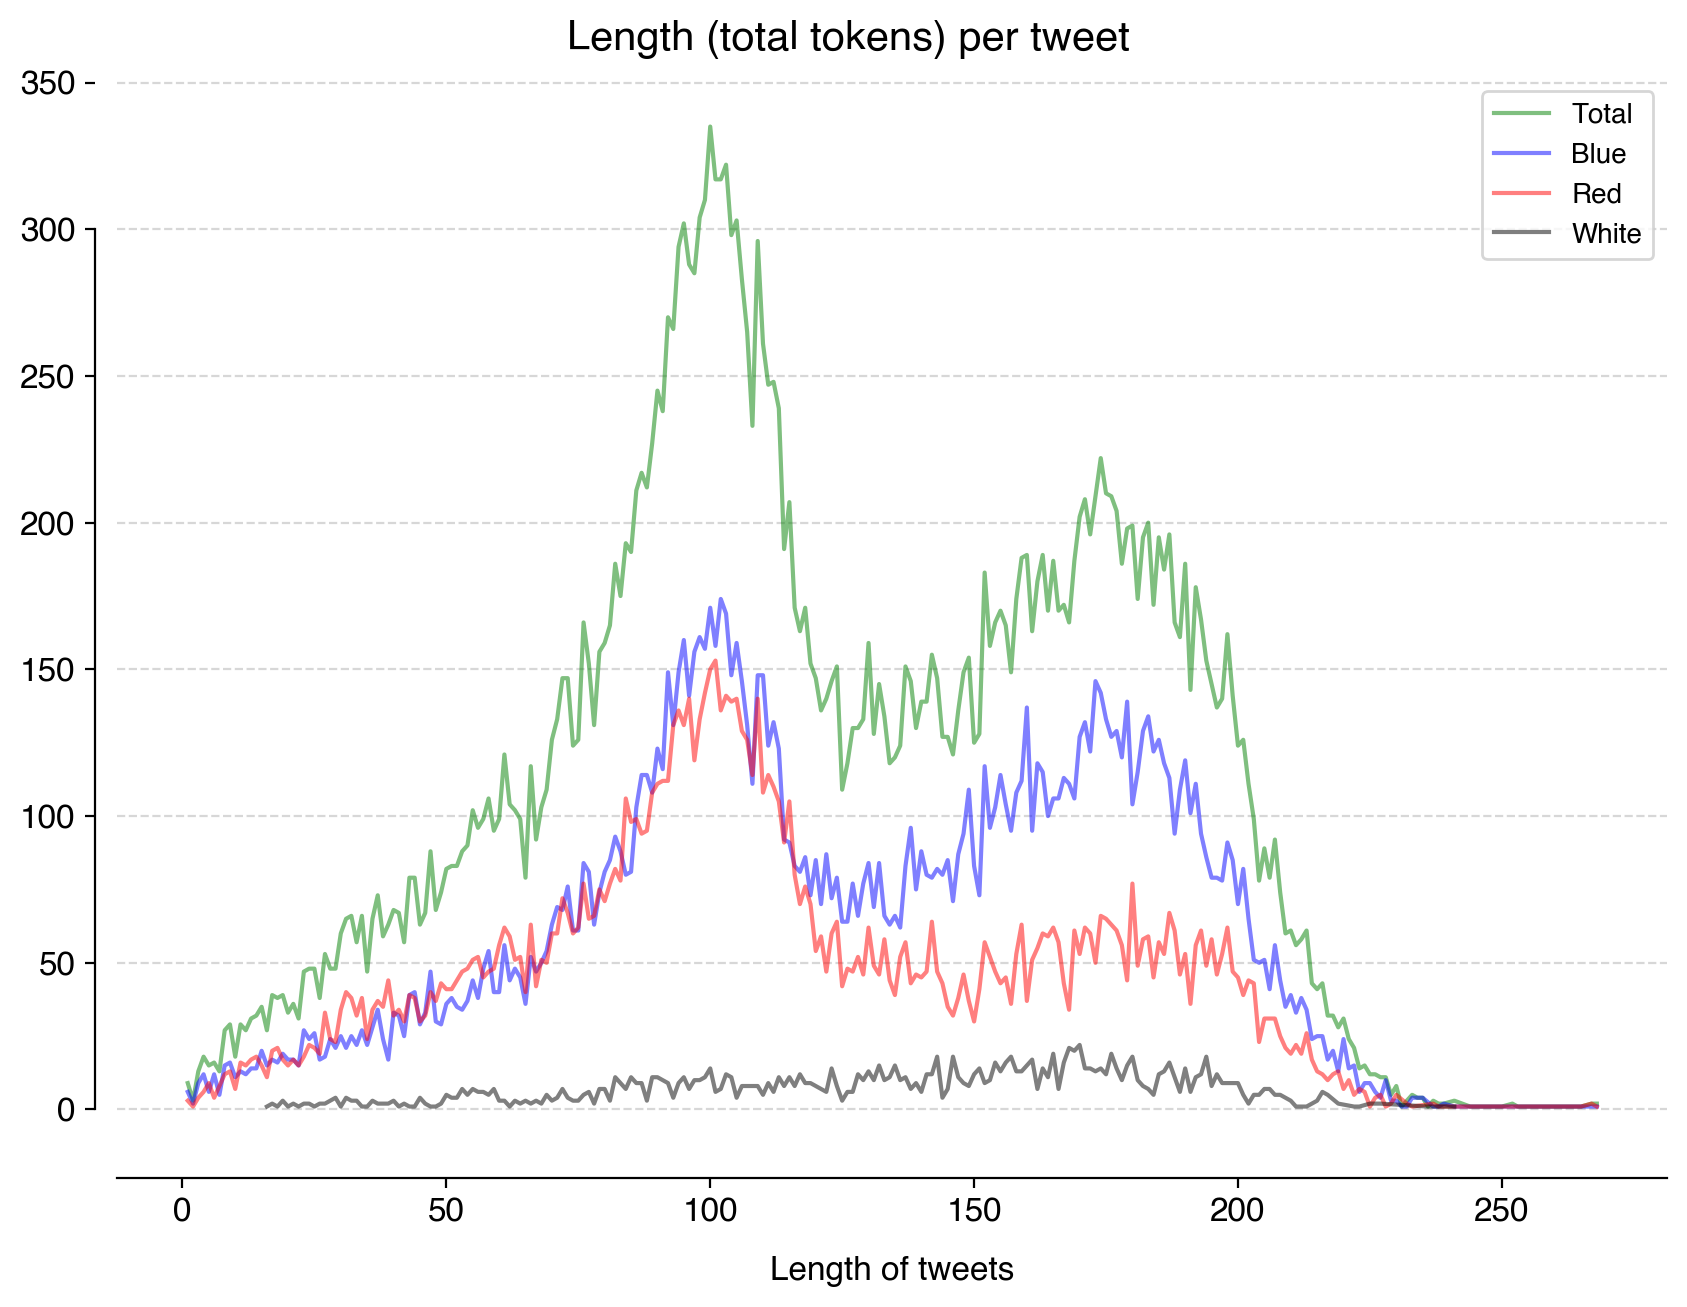

In [157]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
my_range = list(sorted(set(my_range)))
fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlabel('Length of tweets', fontsize=12, fontweight='black', color = 'black', labelpad=10)
ax.set_ylabel("", labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)

tweets_per_handle = df.groupby(['len'])['tweet'].count()
tweets_per_handle1 = df[df['color'] == 'blue'].groupby(['len'])['tweet'].count()
tweets_per_handle2 = df[df['color'] == 'red'].groupby(['len'])['tweet'].count()
tweets_per_handle3 = df[df['color'] == 'white'].groupby(['len'])['tweet'].count()

fig.text(0.35, 0.9, 'Length (total tokens) per tweet', fontsize=15, fontweight='black', color = 'black')

ax.spines[['top', 'right']].set_visible('False')
ax.spines['left'].set_bounds((0, 300))
#ax.set_xlim(0,60)

#ax.set_ylim(-1,2)
ax.yaxis.grid(linestyle='--', alpha=0.5)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 8))
sns.despine()
plt.plot(tweets_per_handle, color="green",
          alpha=0.5, linewidth = 1.5)

plt.plot(tweets_per_handle1, color="blue",
          alpha=0.5, linewidth = 1.5)

plt.plot(tweets_per_handle2, color="red",
          alpha=0.5, linewidth = 1.5)

plt.plot(tweets_per_handle3, color="black",
          alpha=0.5, linewidth = 1.5)

plt.legend(['Total', 'Blue', 'Red', 'White'])

plt.show()

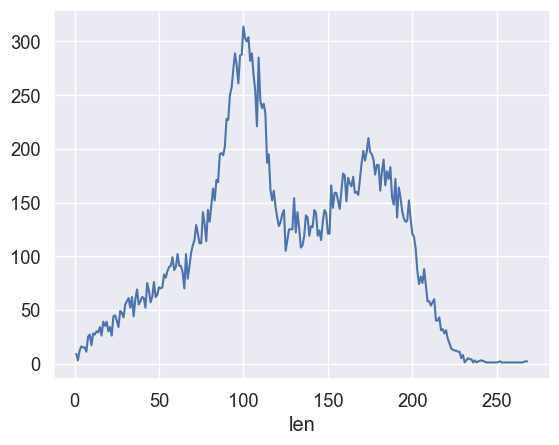

In [108]:
df.groupby(['len'])['tweet'].count().plot();

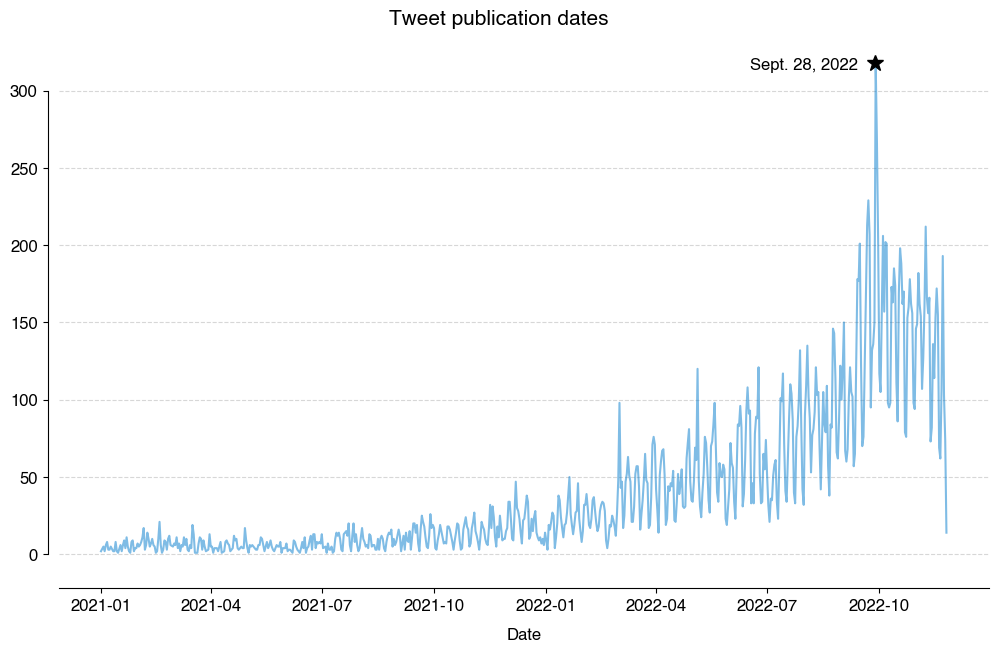

In [332]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
my_range = list(sorted(set(my_range)))
fig, ax = plt.subplots(figsize=(12,7))

ax.set_xlabel('Date', fontsize=12, fontweight='black', color = 'black', labelpad=10)
ax.set_ylabel("", labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)

tweets_per_handle = df.groupby(['date'])['tweet'].count()
tweets_per_handle

fig.text(0.4, 0.9, 'Tweet publication dates', fontsize=15, fontweight='black', color = 'black')

ax.spines[['top', 'right']].set_visible('False')
ax.spines['left'].set_bounds((0, 300))
#ax.set_xlim(0,60)

#ax.set_ylim(-1,2)
ax.yaxis.grid(linestyle='--', alpha=0.5)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 8))
sns.despine()
plt.plot(tweets_per_handle, color="#007ACC",
          alpha=0.5, linewidth = 1.5)
plt.plot(19262.5, 318,'*', ms=12, mec='black', mfc='black')
plt.text(19160, 314, "Sept. 28, 2022", horizontalalignment='left', size=12, color='black', weight='regular')

plt.show()

In [466]:
df[df.date == "2022-09-28"]

date      hour           handle color  account_type   
37    2022-09-28  19:22:59    RepAdamSchiff  blue  professional  \
38    2022-09-28  00:45:00    RepAdamSchiff  blue  professional   
3063  2022-09-28  22:28:45   RepAndyBiggsAZ   red  professional   
3064  2022-09-28  21:25:13   RepAndyBiggsAZ   red  professional   
3065  2022-09-28  21:17:10   RepAndyBiggsAZ   red  professional   
...          ...       ...              ...   ...           ...   
29292 2022-09-28  18:01:18    JohnFetterman  blue      personal   
29293 2022-09-28  16:33:03    JohnFetterman  blue      personal   
29294 2022-09-28  12:31:54    JohnFetterman  blue      personal   
29295 2022-09-28  00:54:03    JohnFetterman  blue      personal   
29463 2022-09-28  17:40:50  LeaderMcConnell   red  professional   

                                                    text   
37     My thoughts are with the people of Florida as ...  \
38     There's no doubt the last year was difficult.\...   
3063   My new border documentary Alien Invasion will ...   
3064   RT @FAIRImmigration: Thank you @RepAndyBiggsAZ...   
3065   Today, I held a forum @FreedomWorks to discuss...   
...                                                  ...   
29292  What promises did Dr. Oz make to Trump in exch...   
29293  For the sake of our children, we simply have t...   
29294  The overhwlmeing Majority of Pennsylvanians: R...   
29295  My heart hurts for Philadelphia tonight. Gisel...   
29463  Democrats wanted one-party control of Washingt...   

                                                   tweet   
37     thoughts people Florida Hurricane Ian make lan...  \
38     doubt last year difficult Jewish community res...   
3063   new border documentary Alien Invasion premiere...   
3064   FAIRImmigration Thank RepAndyBiggsAZ create ti...   
3065   Today hold forum FreedomWorks discuss failures...   
...                                                  ...   
29292  promise Dr. Oz make Trump exchange endorsement...   
29293  sake children simply stop fatal shoot Mayor Br...   
29294  overhwlmeing Majority Pennsylvanians Reproduct...   
29295  heart hurt Philadelphia tonight Gisele devasta...   
29463  Democrats want one-party control Washington ge...   

                                   mentions   
37                                       []  \
38                                       []   
3063                                     []   
3064   [@FAIRImmigration:, @RepAndyBiggsAZ]   
3065       [@FreedomWorks, @DeptVetAffairs]   
...                                     ...   
29292                                    []   
29293                                    []   
29294                                    []   
29295                                    []   
29463                                    []   

                                                  tokens   
37     [My, thoughts, are, with, the, people, of, Flo...  \
38     [There, 's, no, doubt, the, last, year, was, d...   
3063   [My, new, border, documentary, Alien, Invasion...   
3064   [@, FAIRImmigration, :, Thank, you, @, RepAndy...   
3065   [Today, ,, I, held, a, forum, @, FreedomWorks,...   
...                                                  ...   
29292  [What, promises, did, Dr., Oz, make, to, Trump...   
29293  [For, the, sake, of, our, children, ,, we, sim...   
29294  [The, overhwlmeing, Majority, of, Pennsylvania...   
29295  [My, heart, hurts, for, Philadelphia, tonight,...   
29463  [Democrats, wanted, one-party, control, of, Wa...   

                                               stopwords  ... week  weekday   
37     [thoughts, people, Florida, Hurricane, Ian, ma...  ...   39        3  \
38     [doubt, last, year, difficult, Jewish, communi...  ...   39        3   
3063   [new, border, documentary, Alien, Invasion, pr...  ...   39        3   
3064   [FAIRImmigration, Thank, RepAndyBiggsAZ, creat...  ...   39        3   
3065   [Today, held, forum, FreedomWorks, discuss, fa...  ...   39        3   
...  

#### Wordcloud

In [333]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [334]:
words = [item for sublist in df['tweet'] for item in sublist]

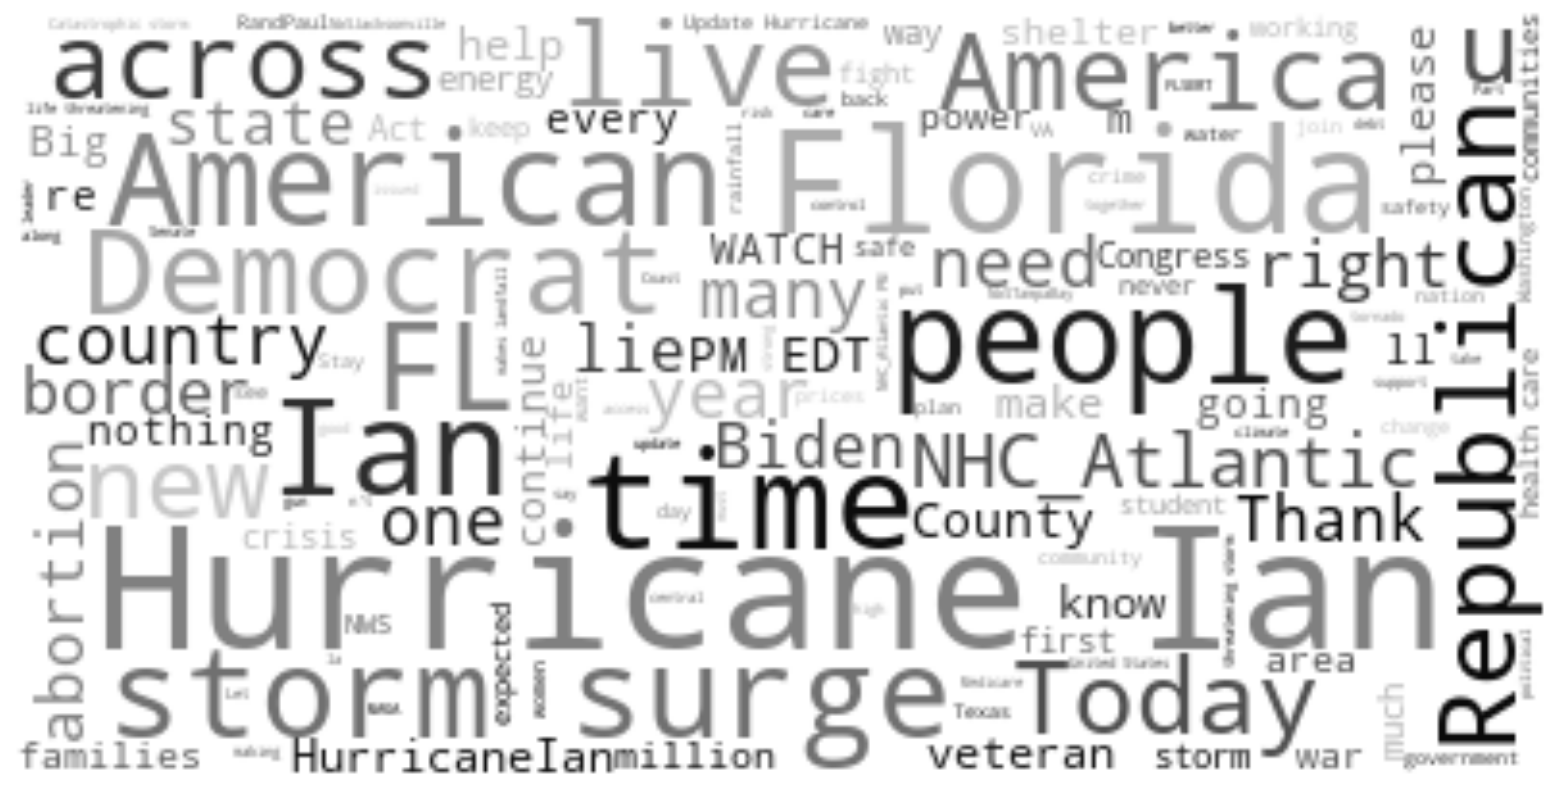

In [474]:
#ian wordcloud
words = []
sept = df[df.date == '2022-09-28']
for tweet in sept['stopwords']:
    for word in tweet:
        words.append(word)
str_word = ' '.join(words)

def new_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,0%%, %d%%)" % np.random.randint(0,80))

wordcloud = WordCloud(background_color ='white',contour_color='black',contour_width=1,colormap='Reds').generate(str_word)
import numpy as np
wordcloud.recolor(color_func = new_color_func)
# Display the generated image:
figsize=(15, 6)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

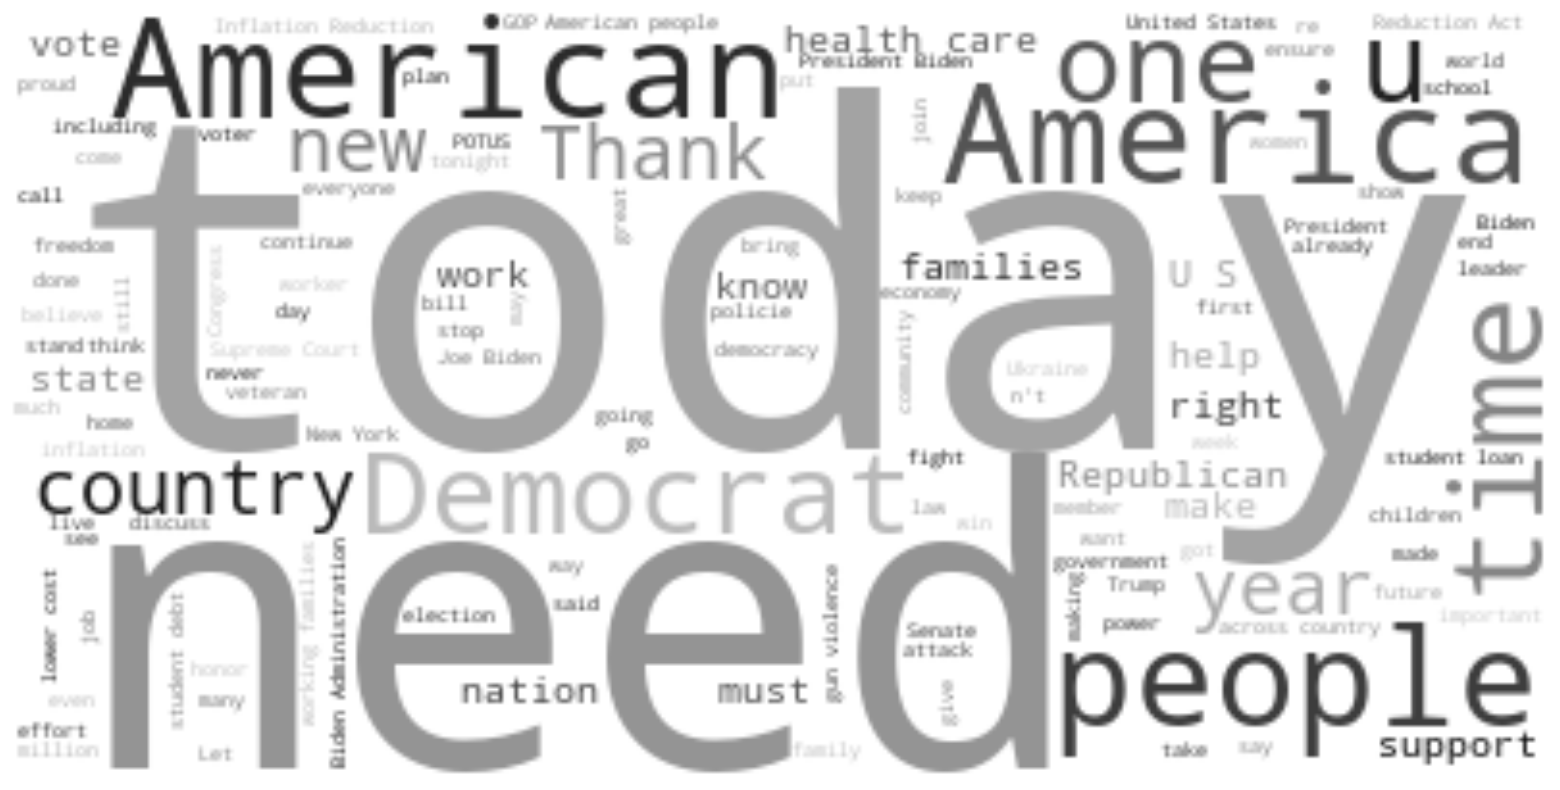

In [523]:
#general wordcloud
words = []
sept = df[df.date == '2022-09-28']
for tweet in df['stopwords']:
    for word in tweet:
        words.append(word)
str_word = ' '.join(words)

def new_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,0%%, %d%%)" % np.random.randint(0,80))

wordcloud = WordCloud(background_color ='white',contour_color='black',contour_width=1,colormap='Reds').generate(str_word)
import numpy as np
wordcloud.recolor(color_func = new_color_func)
# Display the generated image:
figsize=(15, 6)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [342]:
white = df[df.color == 'white']
blue = df[df.color == 'blue']
red = df[df.color == 'red']

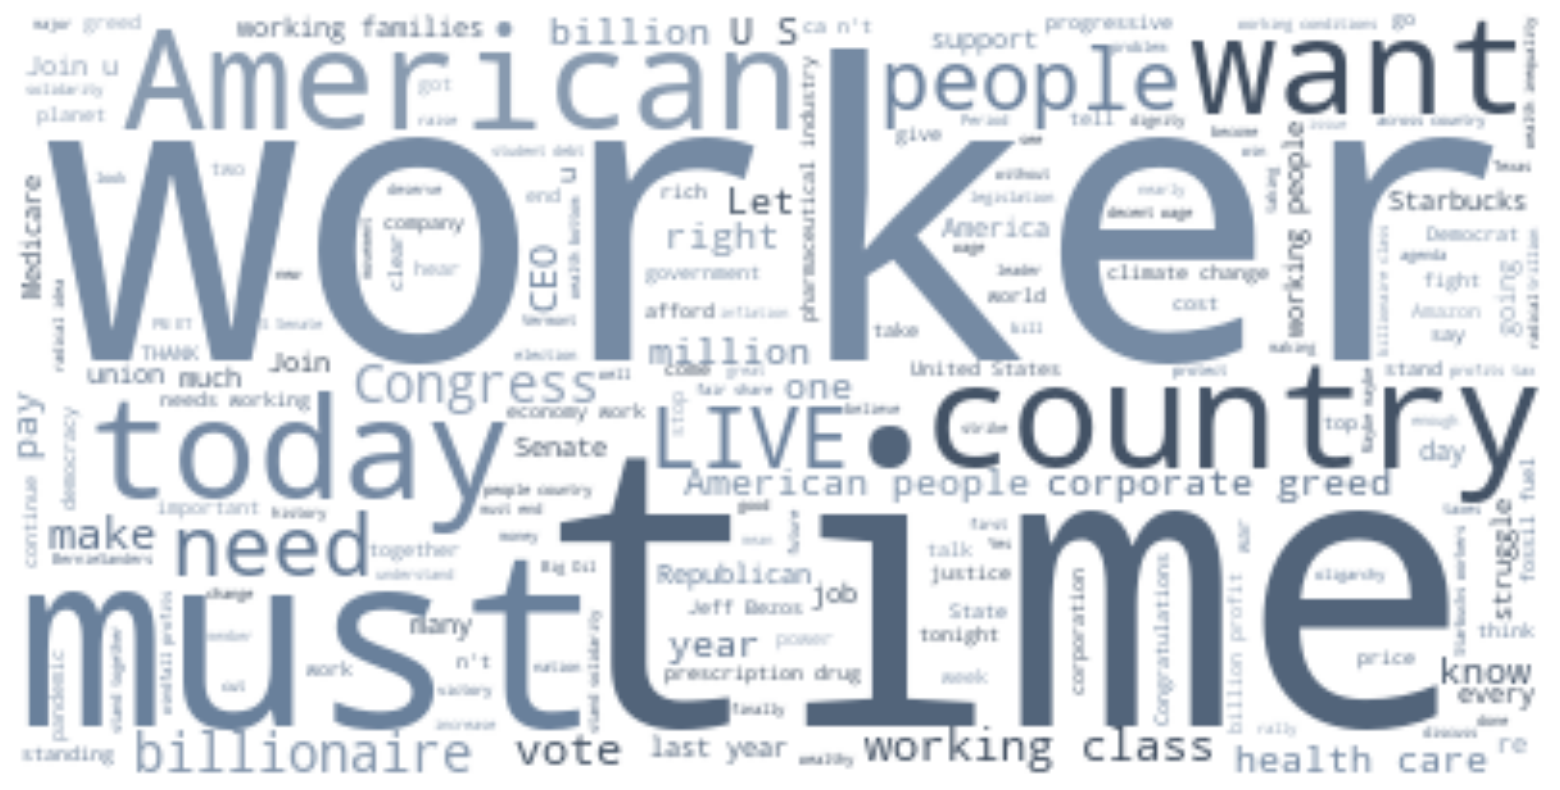

In [378]:
#white wordcloud
words = []
for tweet in white['stopwords']:
    for word in tweet:
        words.append(word)
str_word = ' '.join(words)

def new_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(213,20%%, %d%%)" % np.random.randint(30,70))

wordcloud = WordCloud(background_color ='white',contour_color='black',contour_width=1,colormap='Reds').generate(str_word)
import numpy as np
wordcloud.recolor(color_func = new_color_func)
# Display the generated image:
figsize=(15, 6)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

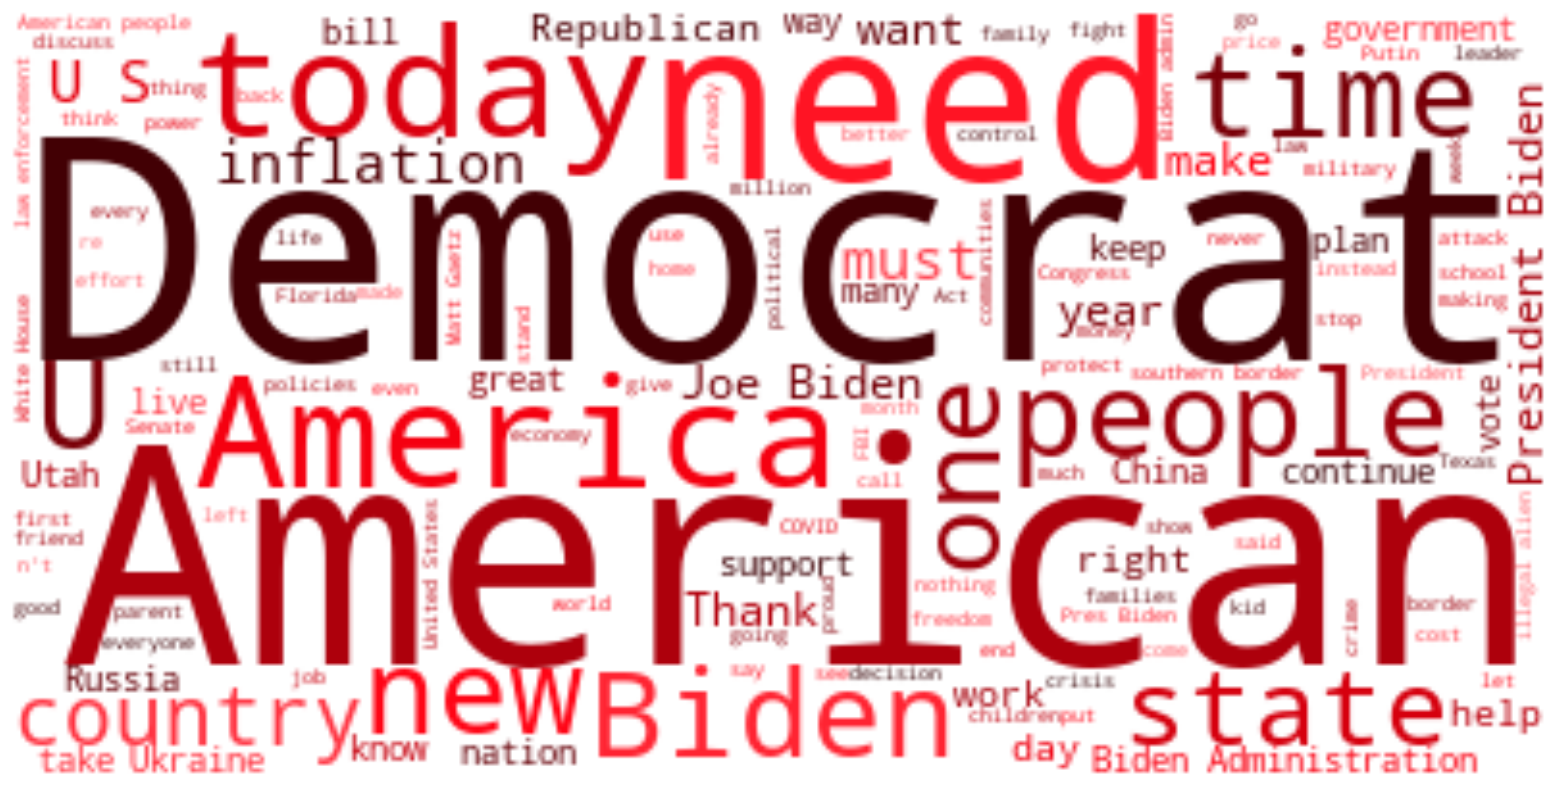

In [368]:
#red wordcloud
words = []
for tweet in red['stopwords']:
    for word in tweet:
        words.append(word)
str_word = ' '.join(words)

def new_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(356,100%%, %d%%)" % np.random.randint(10,70))

wordcloud = WordCloud(background_color ='white',contour_color='black',contour_width=1,colormap='Reds').generate(str_word)
import numpy as np
wordcloud.recolor(color_func = new_color_func)
# Display the generated image:
figsize=(15, 6)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

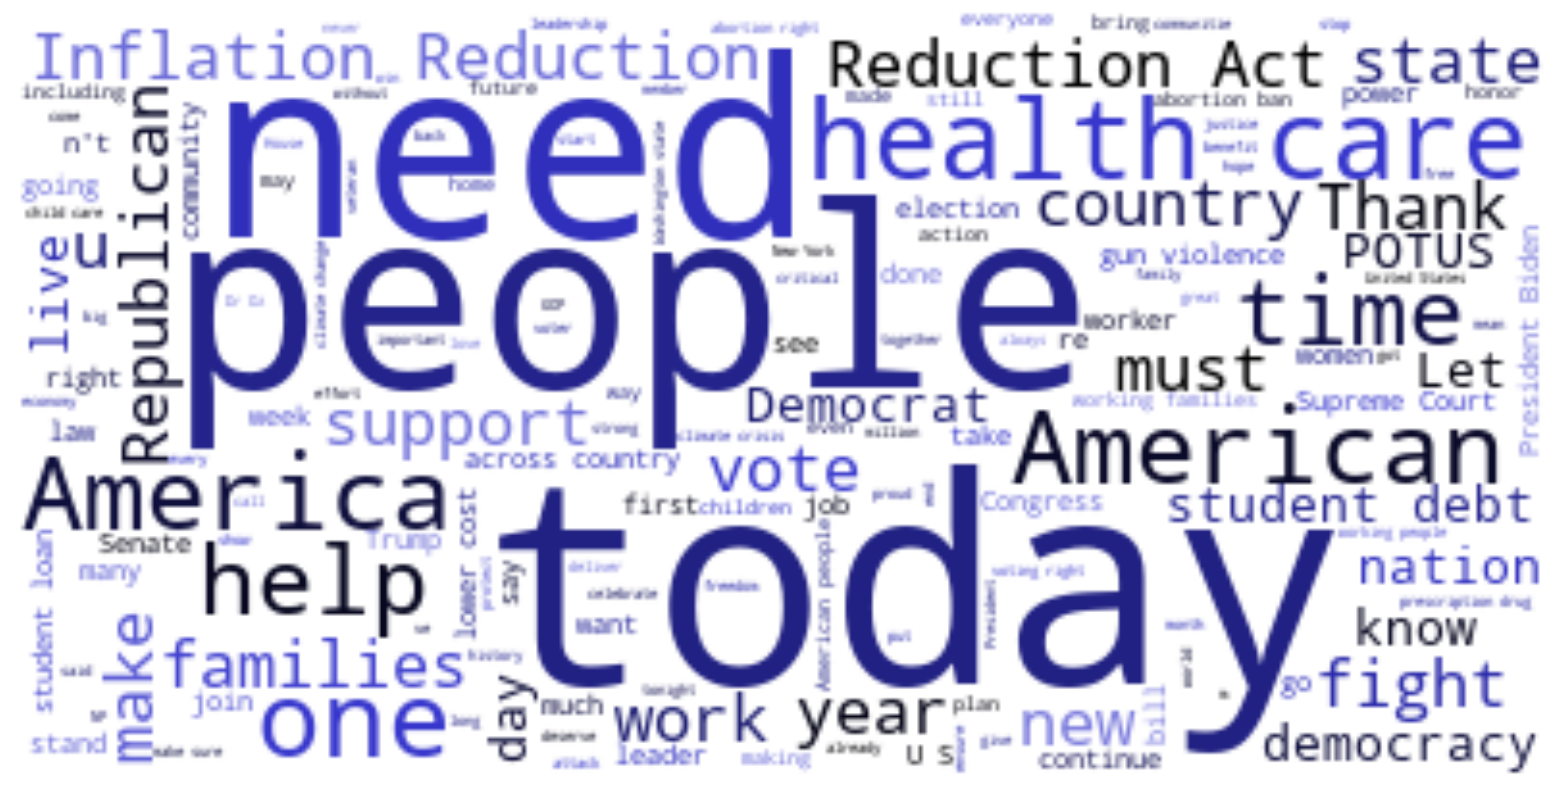

In [373]:
#blue wordcloud
words = []
for tweet in blue['stopwords']:
    for word in tweet:
        words.append(word)
str_word = ' '.join(words)

def new_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(240,60%%, %d%%)" % np.random.randint(0,70))

wordcloud = WordCloud(background_color ='white',contour_color='black',contour_width=1,colormap='Reds').generate(str_word)
import numpy as np
wordcloud.recolor(color_func = new_color_func)
# Display the generated image:
figsize=(15, 6)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### N-Grams

In [390]:
from nltk import ngrams
import collections
def n_grams(df, n):
    plt.set_cmap('seismic')
    n_grams = []
    for tweet in df:
        tweet_n_grams = ngrams(tweet.split(), n) 
        for gram in tweet_n_grams:
            n_grams.append(gram)
    grams = collections.Counter(n_grams)
    topgrams = grams.most_common(5)

    #plot top 5 n-grams
    grams_most = []
    vals =[]
    for i in range(len(topgrams)):
        grams_most.append(str(topgrams[i][0]))
        vals.append(topgrams[i][1])
    ax = sns.barplot(y=grams_most, x=vals, orient='h', color='#0000ee')
    ax.bar_label(ax.containers[0], padding=3)
    for item in ax.get_yticklabels():
        item.set_rotation(25)
    #plt.show()
    return topgrams

In [396]:
topgrams = []
for i in range(2,7):
    topgrams.append(n_grams(df['tweet'], i))
topgrams = [item for sublist in topgrams for item in sublist]

(('health', 'care'), 815)

In [550]:
topgrams_text = []
topgrams_value = []
for i in range(len(topgrams)-1):
    topgrams_text.append(str(topgrams[i][0]))
    topgrams_value.append(topgrams[i][1])

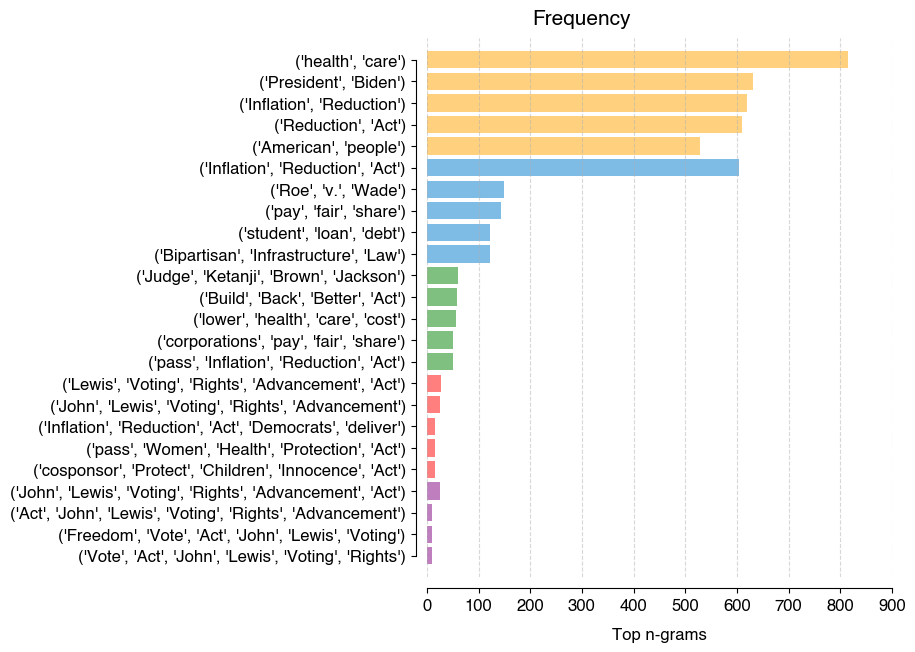

In [572]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

fig, ax = plt.subplots(figsize=(6,7))

ax.set_xlabel('Top n-grams', fontsize=12, fontweight='black', color = 'black', labelpad=10)
ax.set_ylabel("", labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)

fig.text(0.3, 0.9, 'Frequency', fontsize=15, fontweight='black', color = 'black')

ax.spines[['top', 'right']].set_visible('False')
ax.spines['left'].set_bounds((0, 23))
ax.set_xlim(0,900)
ax.set_ylim(-1,24)
ax.invert_yaxis()
ax.xaxis.grid(linestyle='--', alpha=0.5)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 8))
sns.despine()
c = ['orange', 'orange', 'orange', 'orange', 'orange',
     '#007ACC', '#007ACC', '#007ACC', '#007ACC', '#007ACC', 
     'green', 'green', 'green', 'green', 'green',
     "red", "red", "red", "red", "red",
    "purple",     "purple",     "purple",    "purple",    "purple"]
plt.barh(topgrams_text, topgrams_value, color=c,#color="#007ACC",
          alpha=0.5, linewidth = 2)
plt.show();

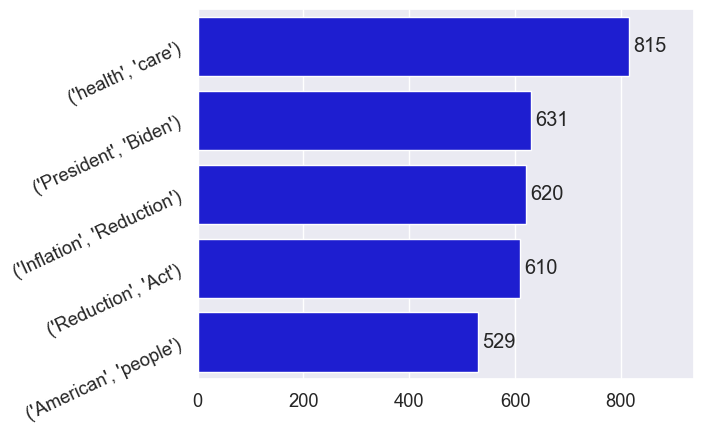

In [387]:
plt.margins(x=0.15,y=0)
sns.set(font_scale=1.2)
t = n_grams(df['tweet'], 2);

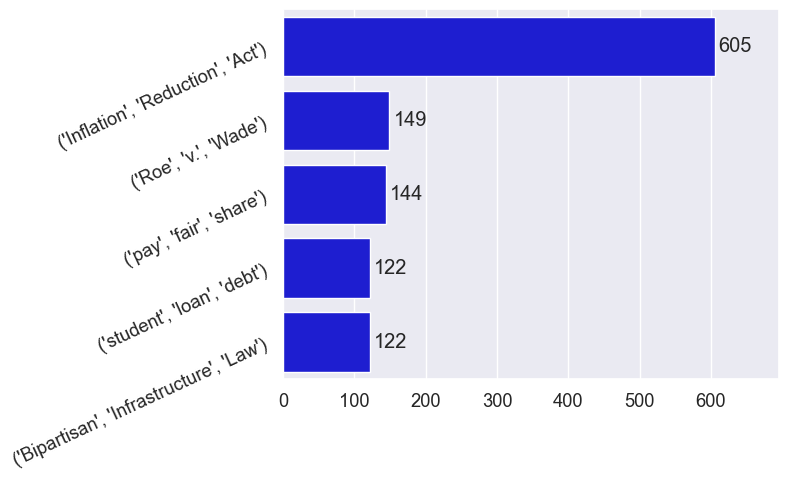

In [115]:
plt.margins(x=0.15,y=0)
sns.set(font_scale=1.2)
n_grams(df['tweet'], 3);

<Axes: >

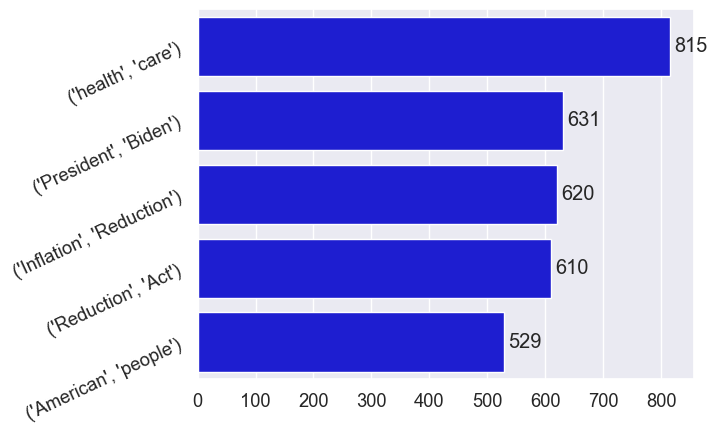

In [116]:
n_grams(df['tweet'], 2)

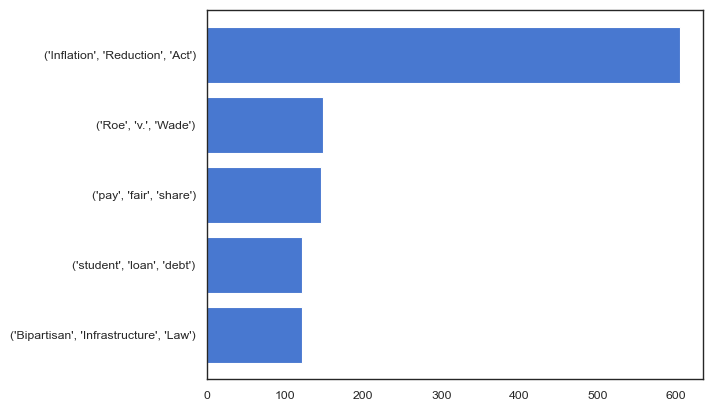

In [373]:
n_grams(df['tweet'], 3)

<Axes: >

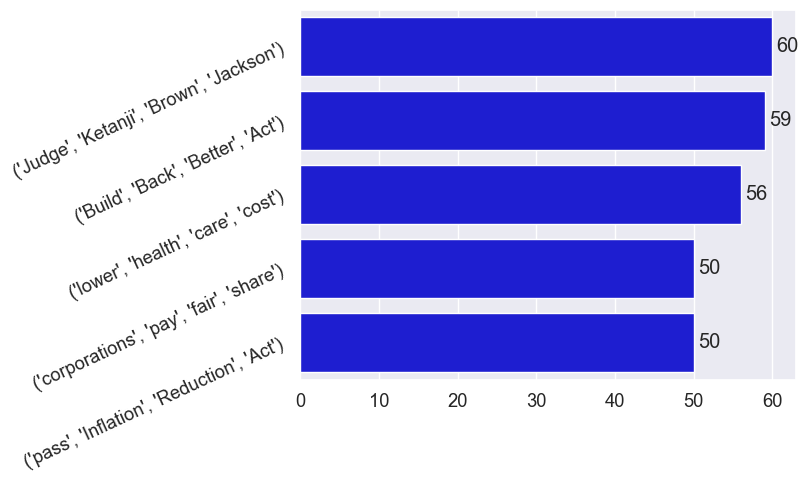

In [117]:
n_grams(df['tweet'], 4)

<Axes: >

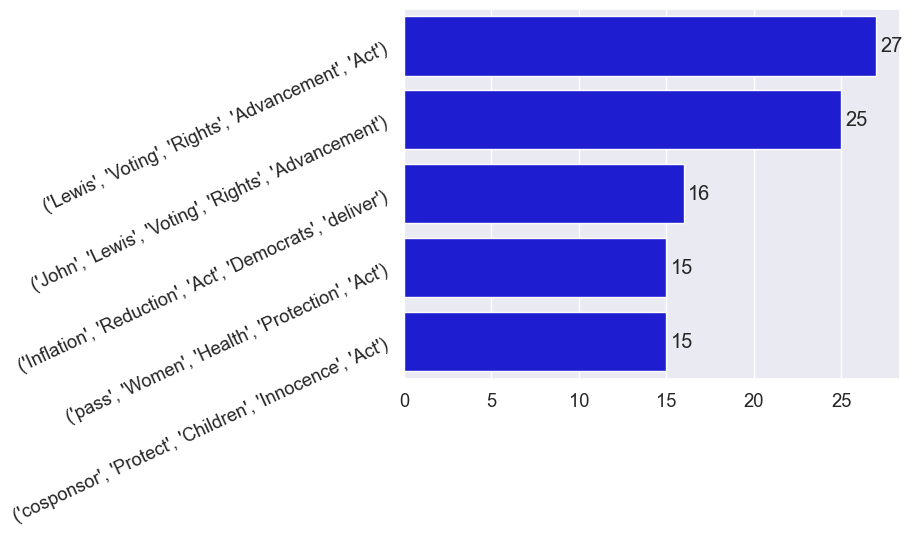

In [118]:
n_grams(df['tweet'], 5)

<Axes: >

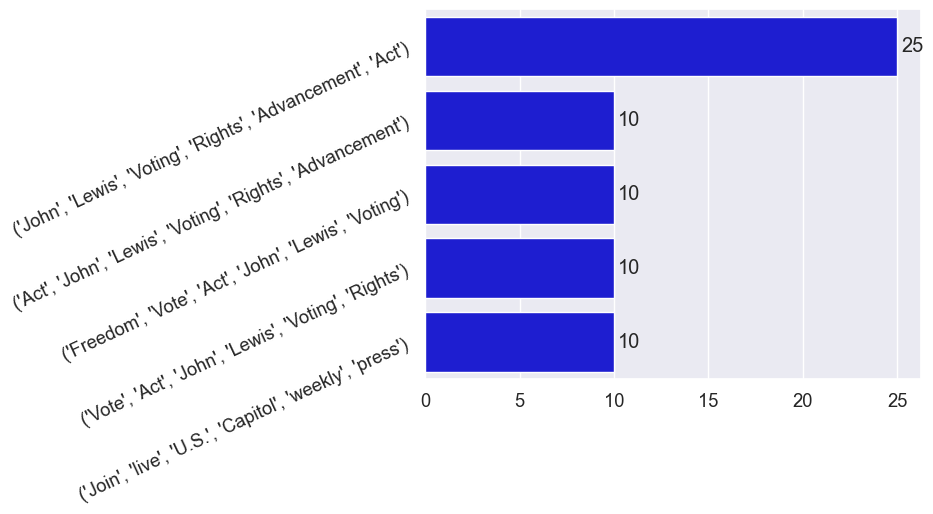

In [119]:
n_grams(df['tweet'], 6)

# Degrees
https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit

In [853]:
degrees = pd.read_csv("degrees.csv")
degree = degrees['degree']
indegree = degrees['In-degree']
outdegree = degrees['Out-degree']

In [854]:
y = [i for i in range(0, len(degree))]

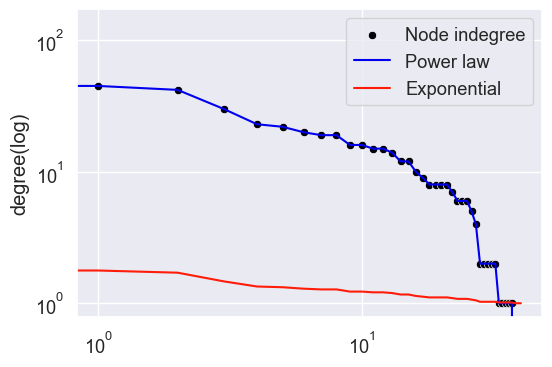

In [855]:
def func_powerlaw(x, alpha, k):
    return k*(x**-alpha)
def expo(x, alpha):
    return alpha**x
fitting_parameters = curve_fit(func_powerlaw, indegree, y)
a,_ = fitting_parameters

fitting_parameters1 = curve_fit(expo, indegree, y)
a1,_ = fitting_parameters1

sns.scatterplot(indegree, color='#000008', marker='o')
plt.plot(func_powerlaw(indegree, -a[0],a[1]), color='#0000ee');
plt.plot(expo(indegree, a1[0]), color='#ff1c08')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('degree(log)')
plt.legend(['Node indegree', 'Power law', 'Exponential']);

In [862]:
residuals = y-func_powerlaw(indegree, *a)
residuals1 = y-expo(indegree, *a1)

In [863]:
ss_res = np.sum(residuals**2)
ss_res1 = np.sum(residuals1**2)

In [864]:
ss_tot = np.sum((y-np.mean(y))**2)

In [865]:
r_squared = 1 - (ss_res / ss_tot)
r_squared1 = 1 - (ss_res1 / ss_tot)

In [866]:
r_squared, r_squared1

(-inf, -28.907527426641128)

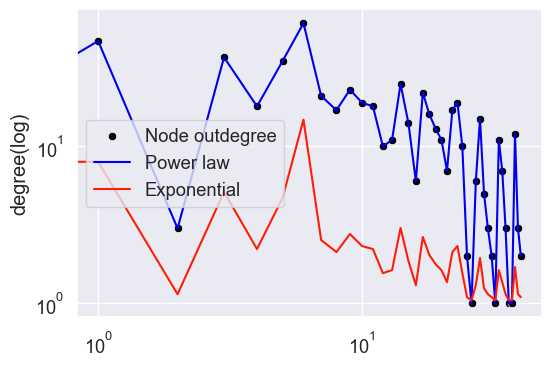

In [861]:
def func_powerlaw(x, alpha, k):
    return k*(x**-alpha)
def expo(x, alpha):
    return alpha**x
fitting_parameters = curve_fit(func_powerlaw, outdegree, y)
a,_ = fitting_parameters

fitting_parameters1 = curve_fit(expo, outdegree, y)
a1,_ = fitting_parameters1

sns.scatterplot(outdegree, color='#000008', marker='o')
plt.plot(func_powerlaw(outdegree, -a[0],a[1]), color='#0000ee');
plt.plot(expo(outdegree, a1[0]), color='#ff1c08')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('degree(log)')
plt.legend(['Node outdegree', 'Power law', 'Exponential']);

In [867]:
residuals = y-func_powerlaw(outdegree, *a)
residuals1 = y-expo(outdegree, *a1)

In [868]:
ss_res = np.sum(residuals**2)
ss_res1 = np.sum(residuals1**2)

In [869]:
ss_tot = np.sum((y-np.mean(y))**2)

In [870]:
r_squared = 1 - (ss_res / ss_tot)
r_squared1 = 1 - (ss_res1 / ss_tot)

In [871]:
r_squared, r_squared1

(-inf, -2.4644694832044043)

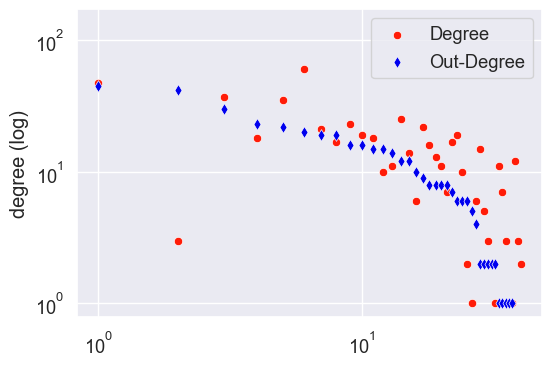

In [703]:
#sns.scatterplot(degree, color='#0000ee', marker='D')
sns.scatterplot(outdegree, color='#ff1c08', marker='o')
sns.scatterplot(indegree, color='#0000ee', marker='d');
plt.legend(['Degree', 'Out-Degree', 'In-Degree']);
plt.ylabel('degree (log)')
plt.xscale('log')
plt.yscale('log')

In [877]:
degrees = pd.read_csv("edges_degrees.csv")
degree = degrees['weight']

In [878]:
y = [i for i in range(0, len(degree))]

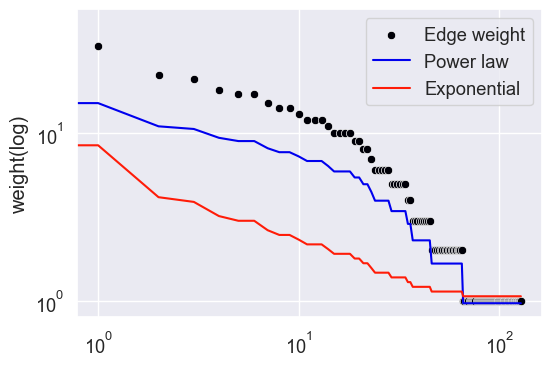

In [880]:
def func_powerlaw(x, alpha, k):
    return k*(x**-alpha)
def expo(x, alpha):
    return alpha**x
fitting_parameters = curve_fit(func_powerlaw, degree, y)
a,_ = fitting_parameters

fitting_parameters1 = curve_fit(expo, degree, y)
a1,_ = fitting_parameters1

sns.scatterplot(degree, color='#000008', marker='o')
plt.plot(func_powerlaw(degree, -a[0],a[1]), color='#0000ee');
plt.plot(expo(degree, a1[0]), color='#ff1c08')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('weight(log)')
plt.legend(['Edge weight', 'Power law', 'Exponential']);

In [881]:
residuals = y-func_powerlaw(degree, *a)
residuals1 = y-expo(degree, *a1)

In [882]:
ss_res = np.sum(residuals**2)
ss_res1 = np.sum(residuals1**2)

In [883]:
ss_tot = np.sum((y-np.mean(y))**2)

In [884]:
r_squared = 1 - (ss_res / ss_tot)
r_squared1 = 1 - (ss_res1 / ss_tot)

In [885]:
r_squared, r_squared1

(0.8766873669705169, -2.8531612895894685)

## LDA-BERTopic Plot

In [28]:
bertopic = {2020: 4,
            2021: 67,
           2022: 392,
           2023: 461} #as of jul 2023

lda = {2020: 10900, 
      2021: 12800,
      2022: 13500,
      2023: 7410}

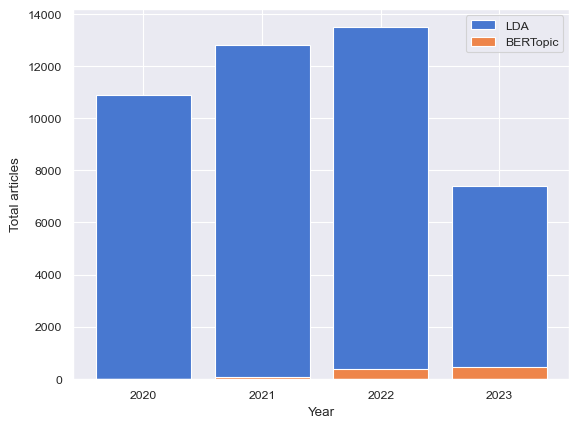

In [33]:
import numpy as np
ind = np.arange(len(lda))
plt.bar(ind, list(lda.values()))
plt.bar(ind, list(bertopic.values()))
plt.xticks(ind, list(lda.keys()))
plt.legend(['LDA', 'BERTopic']);
plt.ylabel('Total articles')
plt.xlabel('Year')
plt.show()